# Parametrization of R

Author:<br>
Nora Poel (1,2)<br>
(1) CNRS/UGA/G-INP, IGE, Grenoble, France<br>
(2) University of Potsdam, Institute for Computer Science, Potsdam, Germany

This notebook addresses the parametrization of the observation error covariance matrix $\mathbf{R}^+$ for an observation vector $\mathbf{y}^+$ in a transformed space. 

We chose the transformation vector $\mathbf{T}$ to calculate the first and second order derivations along and across the observed SWOT pass and denote it as  $\mathbf{T}: \mathbf{y}^+ = \mathbf{Ty}$. The problem is to define an appropriate diagonal matrix $\mathbf{R}^+$ which represents observation error covariances in the transformed space. If $\mathbf{R}$ in the original space has an analytic form it can be shown that there exists a $\mathbf{R}^+$ so that 

$\begin{equation}
\mathbf{R} = \left(\mathbf{T}^\mathrm{T} {\mathbf{R}^+}^{-1} \mathbf{T}\right)^{-1}
\end{equation}$.

$\mathbf{R}$ from the SWOT simulator does not have any well-defined form. Still, we can estimate $\mathbf{R}$ from an ensemble of observations simulated with the SWOT simulator. Based on the estimated $\mathbf{R}$ we aim to find a $\mathbf{R}^+$ so that $\left(\mathbf{T}^\mathrm{T} {\mathbf{R}^+}^{-1} \mathbf{T}\right)^{-1}$ is the best approximation of $\mathbf{R}$.

We define $\mathbf{R}^+$ as<br>

$\begin{equation}
    \mathbf{R}^+ = \begin{pmatrix}
                        \alpha_{0c} & & & & \\
                        & \alpha_{1a} & & & \\
                        & & \alpha_{1c} & & \\
                        & & & \alpha_{2a} & \\
                        & & & & \alpha_{2c}
                    \end{pmatrix}
\end{equation}$

and rewrite  

$\begin{equation}
    \left(\mathbf{T}^\mathrm{T} {\mathbf{R}^+}^{-1} \mathbf{T}\right)^{-1} = \alpha_0^{-1}\mathbf{I}+\alpha_{1a}^{-1}(\mathbf{T}_{1a}^\mathrm{T}\mathbf{T}_{1a})+\alpha_{1c}^{-1}(\mathbf{T}_{1c}^\mathrm{T}\mathbf{T}_{1c})+\alpha_{2a}^{-1}(\mathbf{T}_{2a}^\mathrm{T}\mathbf{T}_{2a})+\alpha_{2c}^{-1}(\mathbf{T}_{2c}^\mathrm{T}\mathbf{T}_{2c}).
\end{equation}$

To approximate at best $\mathbf{R}$ we need to find five scalar parameters $\alpha_0, \alpha_{1a}, \alpha_{1c}, \alpha_{2a} \text{ and } \alpha_{2c}$ that minimize a cost function $\mathcal{J}$ which calculates the different between $\mathbf{R}$ and its synthesized representation $\left(\mathbf{T}^\mathrm{T} {\mathbf{R}^+}^{-1} \mathbf{T}\right)^{-1}$,

$\begin{equation}
    \mathcal{J}(\alpha_h) = \sum_{ij}\left[\mathbf{R}_{ij} - \left(\mathbf{T}^\mathrm{T} {\mathbf{R}^+}^{-1} \mathbf{T}\right)^{-1}_{ij}\left(\alpha_h\right)\right]^2 \mathcal{w}\left(i-j\right)
\end{equation}$

with $\mathcal{w}$ a weight and $\alpha_{h}$ representing the five scalar parameters.

To estimate $\mathbf{R}$ we consider information on variances along and across track known for future SWOT observations and implemented in the SWOT simulator. Accordingly, observations are invariant along track and we thus calculate covariances along and across track independently from one another.

Across track (considered $x$):

$\begin{equation}
    C\left(x,x',0\right) = \int_{y} \frac{1}{N-1}\sum_{i=1}^{N} \epsilon_i\left(x,y\right) \epsilon_i\left( x',y\right) dy
\end{equation}$

where $C\left(x,x',0\right)$ is a covariance matrix for a line across track, $\epsilon$ the error of observations along this line and $N$ the number of observations across track. 

Along track (considered $y$):

$\begin{equation}
    C\left(x,x,\delta y\right) = \int \frac{1}{N-1}\sum_{i=1}^{N} \epsilon_i\left(x,y\right) \epsilon_i\left(x,y+\delta y\right) dy
\end{equation}$

where $C\left(x,x,\delta y\right)$ is the covariance matrix for a line along track, $\epsilon$ the error of observations along this line and $N$ the number of observations along track.

As we separate dimensions $x$ and $y$ to represent covariances in $\mathbf{R}$ we likewise estimate $\left(\mathbf{T}^\mathrm{T} {\mathbf{R}^+}^{-1} \mathbf{T}\right)^{-1}$ independently for $x$ and $y$. We also incorporate the known variances for observations along and across track. The upper equation can then be rewritten as 

$\begin{equation}
    \mathbf{T}^\mathrm{T} {\mathbf{R}^{+}}^{-1} \mathbf{T} = \sigma_c^2 \left(\alpha_0^{-1}\mathbf{I}+\alpha_{1c}^{-1}(\mathbf{T}_{1c}^\mathrm{T}\mathbf{T}_{1c})+\alpha_{2c}^{-1}(\mathbf{T}_{2c}^\mathrm{T}\mathbf{T}_{2c})\right) \sigma_c^2 
\end{equation}$

for across track correlation with $\sigma_c^2$ the variance across track and

$\begin{equation}
    \mathbf{T}^\mathbf{T} {\mathbf{R}^{+}}^{-1} \mathbf{T} = \sigma_a^2 \left(\alpha_0^{-1}\mathbf{I}+\alpha_{1a}^{-1}(\mathbf{T}_{1a}^\mathrm{T}\mathbf{T}_{1a})+\alpha_{2a}^{-1}(\mathbf{T}_{2a}^\mathrm{T}\mathbf{T}_{2a})\right) \sigma_a^2 
\end{equation}$

for along track correlation with $\sigma_a^2$ the variance along track.

In the following, $\mathbf{R}$ will be refered to as $\mathbf{R}^{ref}$ (for "reference").

## 1. Prepare $\mathrm{R}^{ref}$ and $\left(\mathrm{T}^\mathrm{T} {\mathrm{R}^{+}}^{-1} \mathrm{T}\right)^{-1}$

In [1]:
import numpy as np
import numpy.ma as ma
import numpy.linalg as linalg
import matplotlib.pyplot as plt
import xarray as xr
import re
from netCDF4 import Dataset
import os

# for cost function
from matplotlib import cm
import scipy.optimize as so

import SWOTaugmentation as swota
import SWOTdenoise as swotd
import SWOTdetermineRparams as swotr

%matplotlib inline

### 1.2 Generate $(\mathrm{T}_{1c}^{\mathrm{T}}\mathrm{T}_{1c})$, $(\mathrm{T}_{2c}^{\mathrm{T}}\mathrm{T}_{2c})$, $(\mathrm{T}_{1a}^{\mathrm{T}}\mathrm{T}_{1a})$ and $(\mathrm{T}_{2a}^{\mathrm{T}}\mathrm{T}_{2a})$

To generate $(\mathrm{T}_{1c}^{\mathrm{T}}\mathrm{T}_{1c})$, $(\mathrm{T}_{2c}^{\mathrm{T}}\mathrm{T}_{2c})$, $(\mathrm{T}_{1a}^{\mathrm{T}}\mathrm{T}_{1a})$ and $(\mathrm{T}_{2a}^{\mathrm{T}}\mathrm{T}_{2a})$ we use the same module (SWOTaugmentation) that is used to generate the transformed observation vector $\mathbf{y}^+$. Here we call SWOTaugmentation via the module SWOTdetermineRparams. As parameter we hand the size of $\mathbf{T}^\mathrm{T} {\mathbf{R}^{+}}^{-1} \mathbf{T}$ that we want to create, width of SWOT trace for across track calculations (121 km) and 150 km for along track calculations. We chose a size of 150 km to be able to artifically **extend** the ensemble that is in the following used to generate $\mathbf{R}^{ref}$.

In [2]:
dimnc = 121 # size of SWOT pass across track
dimtime = 150 # chosen length of SWOT pass (along track)
dotT1c, dotT2c = swotr.create_TTc(dimnc)
dotT1a, dotT2a = swotr.create_TTa(dimtime)

Here we create $(\mathrm{T}_{1a}^{\mathrm{T}}\mathrm{T}_{1a})$ and $(\mathrm{T}_{2a}^{\mathrm{T}}\mathrm{T}_{2a})$ for the **entire trace** to later compare $\mathbf{R}^{ref}$ of the **entire trace** with $\mathbf{R}^{ref}$ *along track* of the **extended ensemble**. To do so, the empty edges of the trace need to be cut away (in the north and south of the trace).

In [3]:
dimtimeCut = 1150 
dotT1aCut, dotT2aCut = swotr.create_TTa(dimtimeCut)

### 1.5 Load data for $\mathbf{R}^{ref}$ and calculate $\mathbf{R}^{ref}$ (across and along track)
We calculate the observation error $\epsilon$ by substracting ssh_model from denoised ssh_obs.<br>
***Note:*** The denoised observation files only consist of the denoised ssh; information about ssh_model is not preserved. To obtain observation errors (to calculate the difference between denoised ssh_obs and ssh_model) ssh_model must be load from the undenoised files.

In [2]:
datapath = '/home/poeln/Work/obs_pass182'
sshobs_ensname = '/rmdc_denoised_OBS0060.nc.bas'
sshmodel_ensname = '/rmdc_OBS0060.nc.bas'
sshobs_ensname = datapath + sshobs_ensname
sshmodel_ensname = datapath + sshmodel_ensname

ssh_obs,lat,lon = swota.read_ens(sshobs_ensname,varname='ssh_obs')
ssh_model,lat,lon = swota.read_ens(sshmodel_ensname) 

# compute the observation error of denoised ssh data
ssh = ssh_obs-ssh_model

The ensemble size is artifically extended to 360 members by cutting the SWOT trace along track in shorter sub-traces. Each sub-trace has a length of 150 km and the original width of 121 km.

In [3]:
# extend ssh:
# cut trace so that we obtain pieces with lenght 150 km
ssh1 = ssh[:,100:250,:]
ssh2 = ssh[:,250:400,:]
ssh3 = ssh[:,400:550,:]
ssh4 = ssh[:,550:700,:]
ssh5 = ssh[:,700:850,:]
ssh6 = ssh[:,850:1000,:]
sshExtended = np.append(np.append(np.append(ssh1,ssh2,axis=0),np.append(ssh3,ssh4,axis=0),axis=0), np.append(ssh5,ssh6,axis=0),axis=0)
print sshExtended.shape

(360, 150, 121)


### 1.4 Calculate covariance and correlation across and along track
We calculate the correlation and covariance along and across track calling module SWOTdetermineRparams.

In [4]:
# calculation across track for y = 75.
corrSSHc,covSSHc = swotr.corrAcross(sshExtended,time=75)

In [7]:
# calculation along track for x = 0.
corrSSHa,covSSHa = swotr.corrAlong(sshExtended)

To later compare to the **entire trace**:

In [9]:
# cut off not filled edges in north and south of trace
sshCut = ssh[:,100:1250,:]

In [11]:
corrSSHaCut,covSSHaCut = swotr.corrAlong(sshCut) # for ref_line=0
#takes time ~2min

### 1.6 Extract variance (diagonal) of $\mathbf{R}^{ref}$ (across and along track)
We extract the variance of $\mathbf{R}^{ref}$ which is found on the diagonal of the covariance matrix to use it for the calculation of $\mathbf{T}^\mathbf{T} {\mathbf{R}^{+}}^{-1} \mathbf{T}$.
***Across track***

In [6]:
# for extended ssh
varObsC = np.zeros(np.diagonal(covSSHc).shape)
varObsC[:] = np.diagonal(covSSHc)

***Along track***

In [13]:
# for extended ssh
varObsA = np.ones(np.diagonal(covSSHa).shape)
mean_var = np.sum(covSSHa)/dimtime
varObsA = varObsA*mean_var

***Entire trace***

In [14]:
# for ssh (time=[100:1250])
varObsACut = np.ones(np.diagonal(covSSHaCut).shape)
mean_var_Cut = np.sum(covSSHaCut)/covSSHaCut.shape[1]
varObsACut = varObsACut*mean_var_Cut

### 1.8 Plot $\mathrm{R}^{ref}$
***Covariance across track***

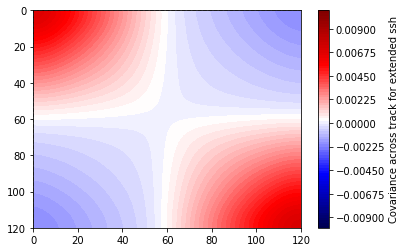

In [15]:
swotr.plot_cov_across(covSSHc,"Covariance across track for extended ssh")

***Correlation across track***

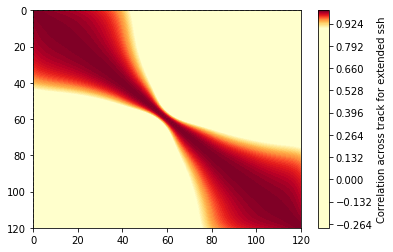

In [16]:
swotr.plot_corr(corrSSHc,"Correlation across track for extended ssh")

***Covariance along track***

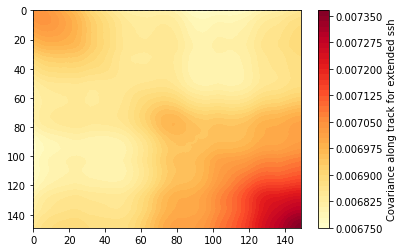

In [17]:
swotr.plot_cov_along(covSSHa,"Covariance along track for extended ssh")

***Correlation along track***

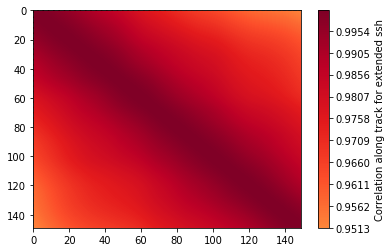

In [18]:
swotr.plot_corr(corrSSHa,"Correlation along track for extended ssh")

***Covariance along entire trace***

Here we plot the covariance for the entire trace. The variance that is spead along the diagonal of the matrix is supposed to be invariant for SWOT observation simulations. Due to the insufficient ensemble size of 60 members the variance still varies.

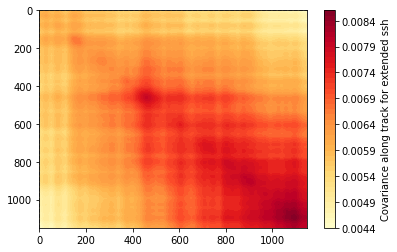

In [19]:
swotr.plot_cov_along(covSSHaCut,"Covariance along track for extended ssh")

***Correlation along entire trace***

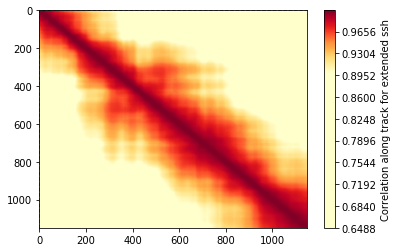

In [20]:
swotr.plot_corr(corrSSHaCut,"Correlation along track for extended ssh")

## 2. Find optimal parameters for $\mathrm{R}$ matrix

In this section we run an optimization procedure to find the parameters that make $\mathbf{T}^\mathbf{T} {\mathbf{R}^{+}}^{-1} \mathbf{T}$ fit best to $\mathbf{R}^{ref}$.
We define the cost function $\mathcal{J}$ that will be minimized as followed:

$\begin{equation}
    \mathcal{J}(\alpha_h) = \sum_{ij}\left[\mathbf{R}^{ref}_{ij} - \left(\mathbf{T}^\mathbf{T} {\mathbf{R}^{+}}^{-1} \mathbf{T}\right)_{ij}\left(\alpha_h\right)^{-1}\right]^2 \mathcal{w}\left(i-j\right)
\end{equation}$

The implementation of the cost function calculates the sum of the difference between each element of $\mathrm{R}^{ref}$ and $\left(\mathbf{T}^\mathbf{T} {\mathbf{R}^{+}}^{-1} \mathbf{T}\right)^{-1}$ by directly substracting two matrices. The difference is than weighted by a matrix $\mathcal{w}$ with is characterized by a Gaspari-Cohn function centered along its diagonal. The Gaspari-Cohn function is typically used in data assimilation for domain localization to ignore error correlations in a long distance. In the data assimilation analysis that follows during this work, we will only consider error correlations in a radius of L = 30 km. The weightening Gaspari-Cohn function is consequently parameterized by an array ranging from -30 to 30 meaning that error correlations outside of this array are cutoff, i.e. reduced to zero.

### 2.1 Plot the weight that is used in the cost function

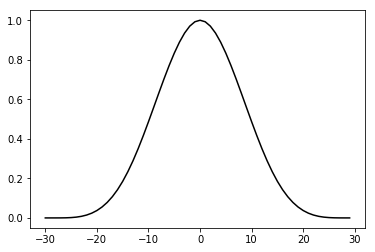

In [21]:
# plot gaspari cohn function
x = np.arange(-30., 30., 1)
plt.plot(x, swotr.gaspari_cohn(x/x[-1]*2),'k')

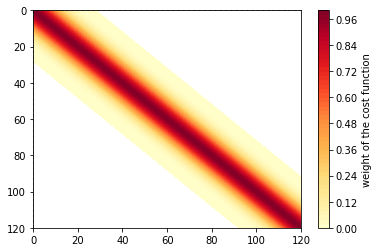

In [12]:
swotr.plot_cov_along(swotr.gaspari_cohn_diag_matrix(covSSHc.shape[0]),"weight of the cost function")

### 2.2 Definition of the cost function
***Across track***

In [29]:
def cost_function_across(params):
    """Compute cost function to minimize and find optimal parameters for R+ matrix. """
    cost=0.
    dimR = covSSHc.shape[0]
    weight = swotr.gaspari_cohn_diag_matrix(dimR)
    
    Ic = np.diag(np.ones(dimR))
    
    M = np.sqrt(np.diag(1/varObsC))
    TRTc = 1/params[0]*Ic+1/params[1]*dotT1c+1/params[2]*dotT2c
    TRTc = np.dot(np.dot(M,TRTc),M)
    TRTcinv = linalg.inv(TRTc)
    
    cost = np.sum( (covSSHc-TRTcinv)*(covSSHc-TRTcinv) * weight)
    return cost

***Along track***

In [28]:
def cost_function_along(params):
    """Compute cost function to minimize and find optimal parameters for R+ matrix. """
    cost=0.
    dimR = covSSHa.shape[0]
    weight = swotr.gaspari_cohn_diag_matrix(dimR)
    
    Ia = np.diag(np.ones(dimR))
    
    M = np.sqrt(np.diag(1/varObsA))
    TRTa = 1/params[0]*Ia+1/params[1]*dotT1a+1/params[2]*dotT2a
    TRTa = np.dot(np.dot(M,TRTa),M)
    TRTainv = linalg.inv(TRTa)
    
    cost = np.sum( (covSSHa-TRTainv)*(covSSHa-TRTainv) * weight )
    return cost

***Along track*** for entire trace

In [26]:
def cost_function_along_cut(params):
    """Compute cost function to minimize and find optimal parameters for R+ matrix. """
    cost=0.
    dimR = covSSHaCut.shape[0]
    weight = swotr.gaspari_cohn_diag_matrix(dimR)
    
    Ia = np.diag(np.ones(dimR))
    
    M = np.sqrt(np.diag(1/varObsACut))
    TRTa = 1/params[0]*Ia+1/params[1]*dotT1aCut+1/params[2]*dotT2aCut
    TRTa = np.dot(np.dot(M,TRTa),M)
    TRTainv = linalg.inv(TRTa)
    
    cost = np.sum( (covSSHaCut-TRTainv)*(covSSHaCut-TRTainv) * weight )
    return cost

### 2.3 Minimize cost function
*** 2.3.1 Across track***

***NOTE:*** initial parameter (params) need to be choosen carefully for the calculation across track (e.g. [0.1,0.1,0.1] provides a unrealistic result.)

In [30]:
params = np.array([0.0001,0.0001,0.0001])
resultc = so.minimize(cost_function_across, params, method = "Powell") 

In [41]:
# 'bad' result with input params = ([0.1,0.1,0.1])
#resultc['x']

array([  3.86633189e+01,   4.44021925e-02,  -4.99918148e-04])

**optimal parameters across track:**

In [31]:
# 'good' result with input params = ([0.0001,0.0001,0.0001])
resultc['x']

array([  1.19239513e+02,   4.72271146e-04,   7.06206541e+04])

***2.3.2 Along track***

In [32]:
params = np.array([0.0001,0.0001,0.0001])
resulta = so.minimize(cost_function_along, params, method = "Powell")

In [370]:
#input params = ([0.1,0.1,0.1])
#resulta['x']

array([  9.99999994e-01,   3.56423205e-06,   4.01836586e+02])

**optimal parameters along track:**

In [33]:
# input params = ([0.0001,0.0001,0.0001])
resulta['x']

array([  9.89278391e-01,   7.92437794e-06,   4.83675412e-07])

***2.3.3 Along track*** for entire trace

In [36]:
params = np.array([0.1,0.1,0.1])
resultaCut = so.minimize(cost_function_along_cut, params, method = "Powell")

In [37]:
resultaCut['x']

array([  7.82083376e-02,   7.04565707e-05,   1.50517136e-06])

## 3. Calculate $\left(\mathrm{T}^\mathrm{T} {\mathrm{R}^{+}}^{-1} \mathrm{T}\right)^{-1}$ 
In this section we plot $\left(\mathrm{T}^\mathrm{T} {\mathrm{R}^{+}}^{-1} \mathrm{T}\right)^{-1}$ using the obtained parameters and compare them to the plot of $\mathbf{R}^{ref}$.
### 3.1 ***Across track:*** $\left(\mathrm{T}^\mathrm{T} {\mathrm{R}^{+}}^{-1} \mathrm{T}\right)^{-1} = \sigma_c^2\left(\alpha_0^{-1}\mathrm{I}+\alpha_{1c}^{-1}(\mathrm{T}_{1c}^\mathrm{T}\mathrm{T}_{1c})+\alpha_{2c}^{-1}(\mathrm{T}_{2c}^\mathrm{T}\mathrm{T}_{2c})\right)\sigma_c^2$ with ***optimal*** parameters

In [38]:
a0c = resultc['x'][0]
a1c = resultc['x'][1]
a2c = resultc['x'][2]

Idc = np.diag(np.ones(121))

M = np.sqrt(np.diag(1/varObsC))
TRTcfinal = 1/a0c*Idc+1/a1c*dotT1c+1/a2c*dotT2c
TRTcfinal = np.dot(np.dot(M,TRTcfinal),M)
TRTcinvfinal = linalg.inv(TRTcfinal)

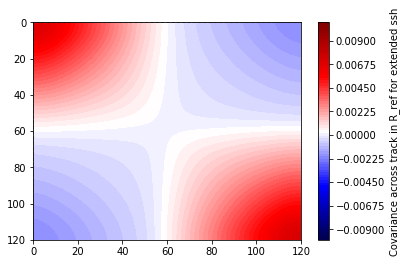

In [39]:
swotr.plot_cov_across(covSSHc,"Covariance across track in R_ref for extended ssh")

The parameters for this plot were calculated without the weight in the cost function. It shows a better approximation on $\mathbf{R}^{ref}$ considering all correlations. In comparison to the second plot that was calculated including the weight it though shows poorer approximation in correlations within 30 km.

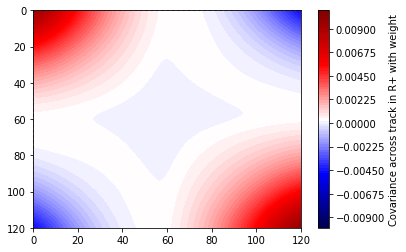

In [38]:
swotr.plot_cov_across(TRTcinvfinal,"Covariance across track in R+ without weight")

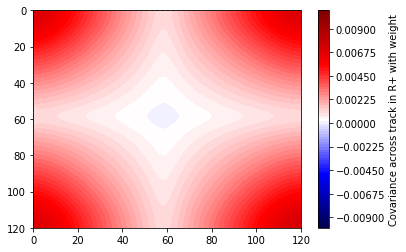

In [40]:
swotr.plot_cov_across(TRTcinvfinal,"Covariance across track in R+ with weight")

### 3.2 ***Along track:*** $\left(\mathrm{T}^\mathrm{T} {\mathrm{R}^{+}}^{-1} \mathrm{T}\right)^{-1} = \sigma_a^2\left(\alpha_0^{-1}\mathrm{I}+\alpha_{1a}^{-1}(\mathrm{T}_{1a}^\mathrm{T}\mathrm{T}_{1a})+\alpha_{2a}^{-1}(\mathrm{T}_{2a}^\mathrm{T}\mathrm{T}_{2a})\right)\sigma_a^2$

In [41]:
Ida = np.diag(np.ones(150))

a0a = resulta['x'][0]
a1a = resulta['x'][1]
a2a = resulta['x'][2]

Ma = np.sqrt(np.diag(1/varObsA))
TRTafinal = 1/a0a*Ida+1/a1a*dotT1a+1/a2a*dotT2a
TRTafinal = np.dot(np.dot(Ma,TRTafinal),Ma)
TRTainvfinal = linalg.inv(TRTafinal)

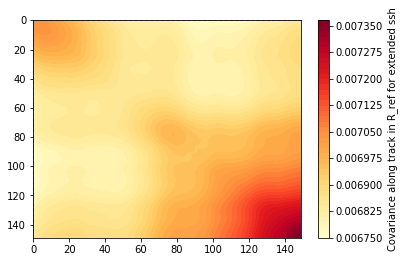

In [42]:
swotr.plot_cov_along(covSSHa,"Covariance along track in R_ref for extended ssh")

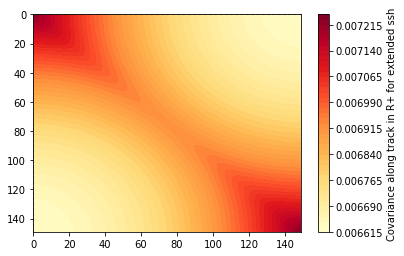

In [43]:
swotr.plot_cov_along(TRTainvfinal,"Covariance along track in R+ for extended ssh")

### 3.3 ***Along track***, cropped trace

In [44]:
Ida = np.diag(np.ones(1150))

a0a = resultaCut['x'][0]
a1a = resultaCut['x'][1]
a2a = resultaCut['x'][2]

Ma = np.sqrt(np.diag(1/varObsACut))
TRTafinalCut = 1/a0a*Ida+1/a1a*dotT1aCut+1/a2a*dotT2aCut
TRTafinalCut = np.dot(np.dot(Ma,TRTafinalCut),Ma)
TRTainvfinalCut = linalg.inv(TRTafinalCut)

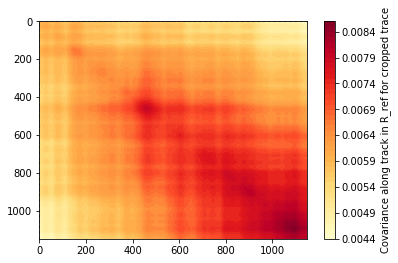

In [46]:
swotr.plot_cov_along(covSSHaCut,"Covariance along track in R_ref for cropped trace")

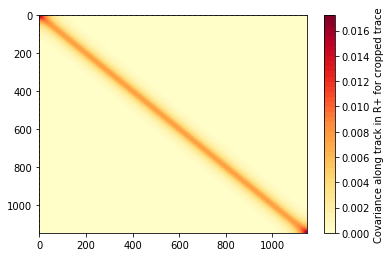

In [47]:
swotr.plot_cov_along(TRTainvfinalCut,"Covariance along track in R+ for cropped trace") # with weight

## 4. Generate $R^+$
We call the module SWOTaugmentation to generate $\mathbf{R}^+$ files that can be used to run an analysis with SESAM.

In [7]:
datapath = '/home/poeln/Work/obs_pass182/extendP182'
inputensname = '/obs_p182_SWOT0007_denoised.nc'
obsname = datapath + inputensname

alpha0c = 1.19239513e+02
alpha1c = 4.72271146e-04
alpha2c = 7.06206541e+04

alpha0a = 9.89278391e-01
alpha1a = 7.92437794e-06
alpha2a = 4.83675412e-07

swota.write_Rplus(obsname,varObsC,alpha0a,alpha0c,alpha1a,alpha1c,alpha2a,alpha2c)

R plus in  /home/poeln/Work/obs_pass182/extendP182/
